In [69]:
import pandas as pd
import nltk
import json  
import sys  

import seaborn as sns  
import matplotlib.pyplot as plt  

from nltk.stem.snowball import EnglishStemmer
import plotly.express as px  

# nltk.download('punkt')
# nltk.download('stopwords')

import pandas as pd  
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.decomposition import PCA  
from sklearn.manifold import TSNE  
from umap import UMAP  # UMAP peut nécessiter une installation: !pip install umap-learn  
import matplotlib.pyplot as plt  
import seaborn as sns  
from nltk.stem import SnowballStemmer  
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize  

## Recupérer et explorer les données

La première chose que je fais est de lire mon fichier d'entrée, lire la colonne description et rajouter deux colonnes:
- word_count > Compte le nombre total de mot dans la colonne description
- unique_word_count > Compte le nombre unique de mot dans la colonne description

J'affiche ensuite les 20 produits qui ont le plus de mots et je rajoute le nombre de mot unique.

In [70]:
df = pd.read_csv("./../input/df_cleaned.csv")

In [71]:
print("Shape is", df.shape)
df.head()

Shape is (1044, 12)


,uniq_id,product_name,description,cat_baby care,cat_beauty and personal care,cat_computers,cat_home decor & festive needs,cat_home furnishing,cat_kitchen & dining,cat_watches,cat,clean_desc
0,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunlight.,Specifications of Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) General Brand Elegance Designed For Door Type Eyelet Model Name Abstract Polyester Door Curtain Set Of 2 Model ID Duster25 Color Multicolor Dimensions Length 213 cm In the Box Number of Contents in Sales Package Pack of 2 Sales Package 2 Curtains Body & Design Material Polyester",0,0,0,0,1,0,0,home furnishing,eleg polyest multicolor abstract eyelet door curtain floral curtain eleg polyest multicolor abstract eyelet door curtain curtain enhanc interior curtain polyest fabric eyelet stitch metal ring room environ curtain ant wrinkl anti shrinkag eleg give home bright appeal attent contemporari eyelet curtain slide smoothli draw apart first thing morn welcom bright sun ray want wish good morn whole draw even creat special moment given sooth print bring home eleg curtain room right amount sunlight eleg polyest multicolor abstract eyelet door curtain eleg door eyelet model name abstract polyest door curtain model multicolor length curtain polyest
1,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel",1,0,0,0,0,0,0,baby care,sathiya cotton bath towel bath towel yellow bath towel machin washabl cotton self sathiya bath towel gsm model name sathiya cotton bath towel men women boy girl model yellow length inch inch bath towel
2,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set,"Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft texture that takes care of your skin and gives you that enriched feeling you deserve. Eurospa has been exporting its bath towels to lot of renowned brands for last 10 years and is famous for its fine prints, absorbency, softness and durability. NOTE: Our product is 100% cotton, so it is susceptible to shrinkage. Product color may vary from the picture. Size may vary by ±3% WASH CARE: Wash in cold Water, Do not Iron, Do not Bleach, Flat dry, Wash before first use. SIZE- FACE TOWEL - 23 cms X 23 cms.,Specifications 

### With clean description

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   uniq_id                         1044 non-null   object
 1   product_name                    1044 non-null   object
 2   description                     1044 non-null   object
 3   cat_baby care                   1044 non-null   int64 
 4   cat_beauty and personal care    1044 non-null   int64 
 5   cat_computers                   1044 non-null   int64 
 6   cat_home decor & festive needs  1044 non-null   int64 
 7   cat_home furnishing             1044 non-null   int64 
 8   cat_kitchen & dining            1044 non-null   int64 
 9   cat_watches                     1044 non-null   int64 
 10  cat                             1044 non-null   object
 11  clean_desc                      1044 non-null   object
dtypes: int64(7), object(5)
memory usage: 98.0+ KB


In [73]:
pd.set_option('display.max_colwidth', -1)  


/var/folders/x_/0z24g8110_n09vlvhxmrh0_w0000gp/T/ipykernel_24892/1139379382.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [74]:
df[df["clean_desc"].isna()]

,uniq_id,product_name,description,cat_baby care,cat_beauty and personal care,cat_computers,cat_home decor & festive needs,cat_home furnishing,cat_kitchen & dining,cat_watches,cat,clean_desc


In [75]:
for idx, item in df.iterrows():
    desc = item["clean_desc"]
    words = desc.split(" ")  
    
    df.at[idx, 'word_count_clean'] = len(words)  
    df.at[idx, 'unique_word_count_clean'] = len(set(words)) 

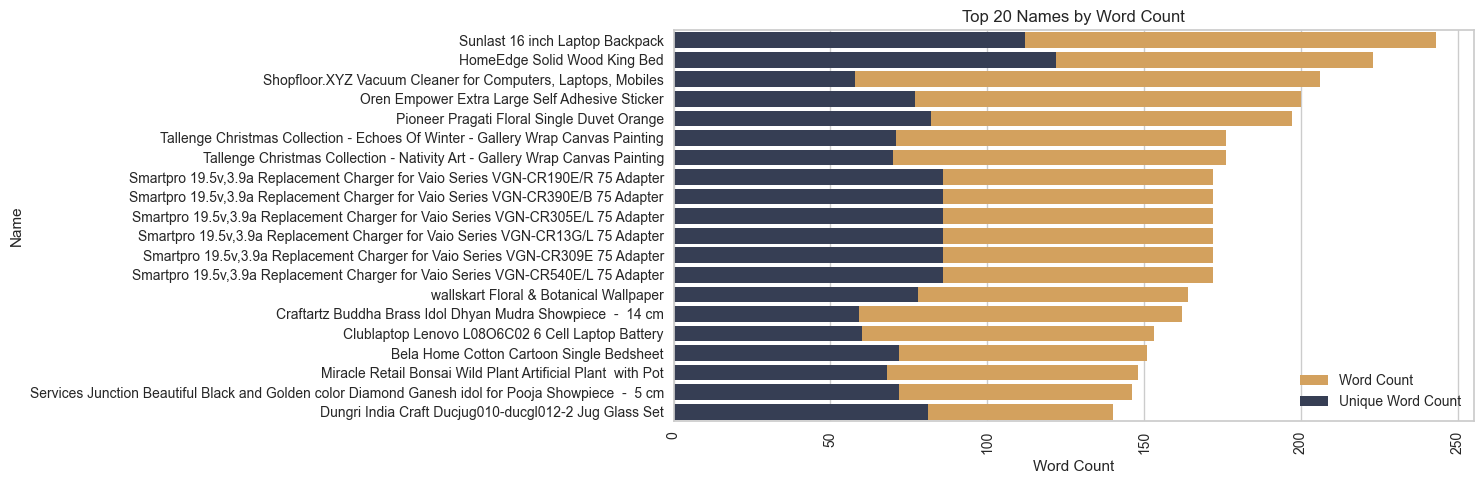

In [76]:
sorted_df_clean = df.sort_values("word_count_clean", ascending=False)    
top_names = sorted_df_clean["product_name"].head(20)  
# top_names = [name[:60] + "..." if len(name) > 50 else name for name in top_names]    
  
top_word_counts = sorted_df_clean["word_count_clean"].head(20)  
top_unique_counts = sorted_df_clean["unique_word_count_clean"].head(20)  
  
plt.figure(figsize=(15, 5))  
  
# Create a horizontal barplot using seaborn    
sns.barplot(y=top_names, x=top_word_counts, orient="h",  color="#e7a44a", label="Word Count")    
sns.barplot(y=top_names, x=top_unique_counts, orient="h",  color="#313c59", label="Unique Word Count")    
  
# Set the title and axes labels    
plt.title("Top 20 Names by Word Count")    
plt.xlabel("Word Count")    
plt.ylabel("Name")    

# Rotate x-axis labels for better readability    
plt.xticks(rotation=90)
    
# Display the plot 
plt.legend()
plt.tight_layout()  
plt.show()  


In [77]:
# Étape 2 : Vectorisation avec TF-IDF  
vectorizer_clean = TfidfVectorizer()  
description_vector_clean = vectorizer_clean.fit_transform(df['clean_desc'])  
  
# Concaténation des features TF-IDF et les features supplémentaires  
X_clean = pd.concat([pd.DataFrame(description_vector_clean.toarray())], axis=1)  
# X = pd.concat([pd.DataFrame(description_vector.toarray()), df[['word_count', 'unique_word_count']].astype(int)], axis=1)  

In [78]:
X_clean

,0,1,2,3,4,5,6,7,8,9,...,2600,2601,2602,2603,2604,2605,2606,2607,2608,2609
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.183027,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.060104,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1040,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1041,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1042,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
X_clean.columns = X_clean.columns.astype(str)  

# Étape 3 : Réduction de dimension  
pca_clean = PCA(n_components=2)  
description_2d_pca_clean = pca_clean.fit_transform(X_clean)  
  
tsne_clean = TSNE(n_components=2, perplexity=50, n_iter=1000)  
description_2d_tsne_clean = tsne_clean.fit_transform(X_clean)  
  
umap_clean = UMAP(n_components=2)  
description_2d_umap_clean = umap_clean.fit_transform(X_clean)  

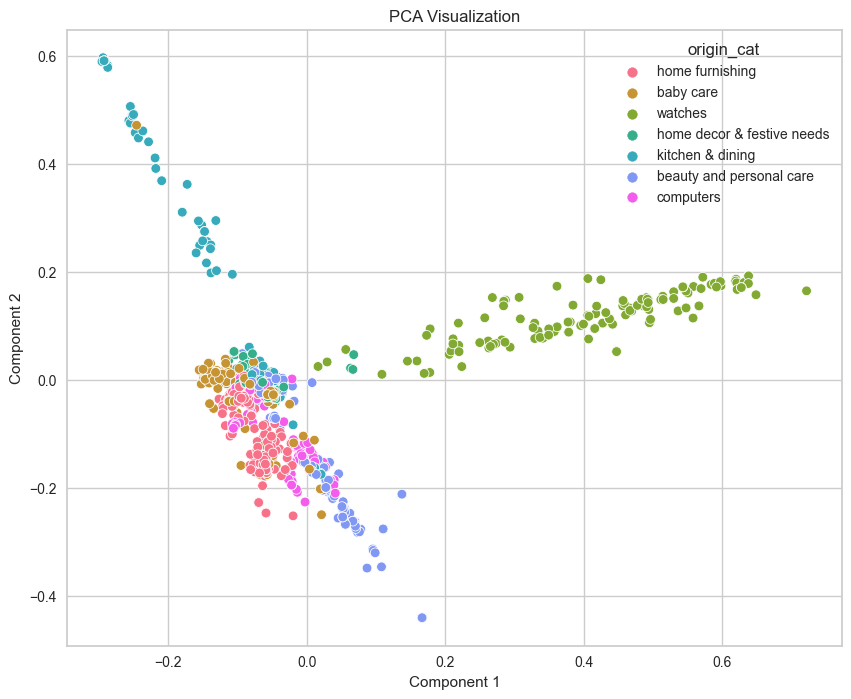

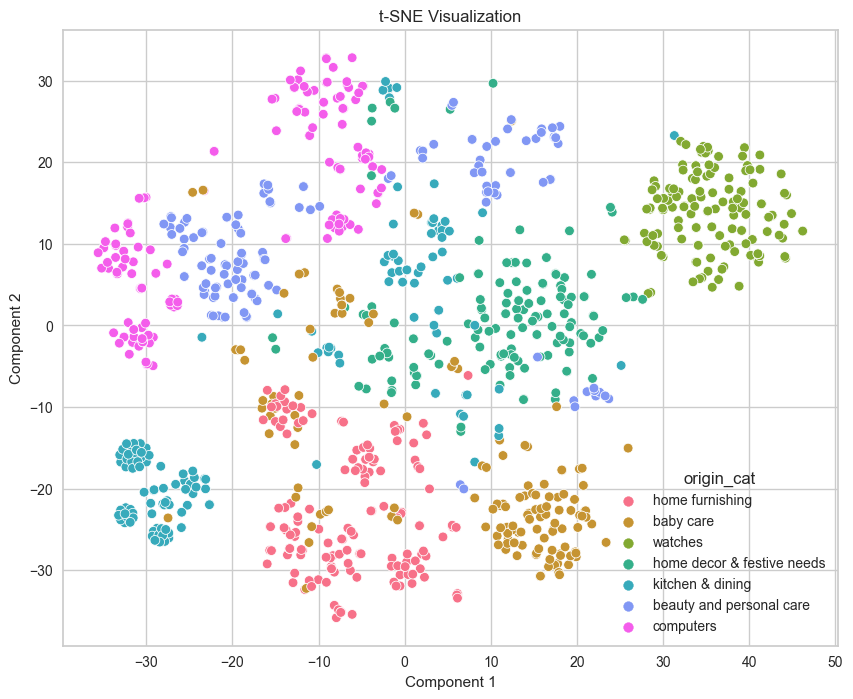

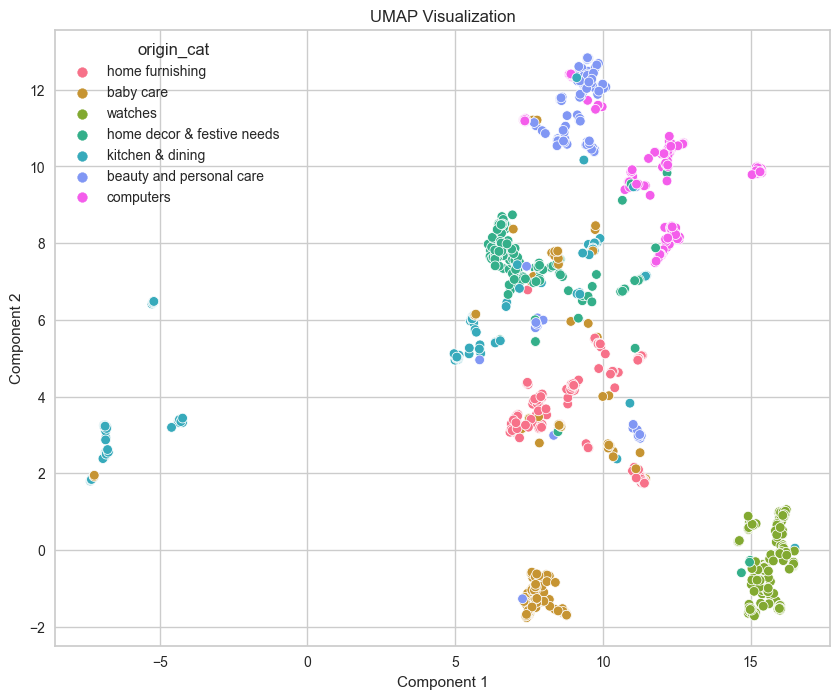

In [80]:
# Étape 5 : Visualisation  
def plot_components(data_2d, title):  
    df_eda = pd.DataFrame(data_2d, columns=['Component 1', 'Component 2'])  
    df_eda['origin_cat'] = df['cat']
    
    
    
    plt.figure(figsize=(10, 8))  
    sns.scatterplot(x='Component 1', y='Component 2', hue='origin_cat', data=df_eda)  
    plt.xlabel('Component 1')  
    plt.ylabel('Component 2')  
    plt.title(title)  
    plt.show()  
  
# Visualisation avec PCA, t-SNE, UMAP  
plot_components(description_2d_pca_clean, 'PCA Visualization')  
plot_components(description_2d_tsne_clean, 't-SNE Visualization')  
plot_components(description_2d_umap_clean, 'UMAP Visualization')  

### Without cleaned description

In [81]:
for idx, item in df.iterrows():
    desc = item["description"]  
    words = desc.split(" ")  
    
    df.at[idx, 'word_count'] = len(words)  
    df.at[idx, 'unique_word_count'] = len(set(words)) 

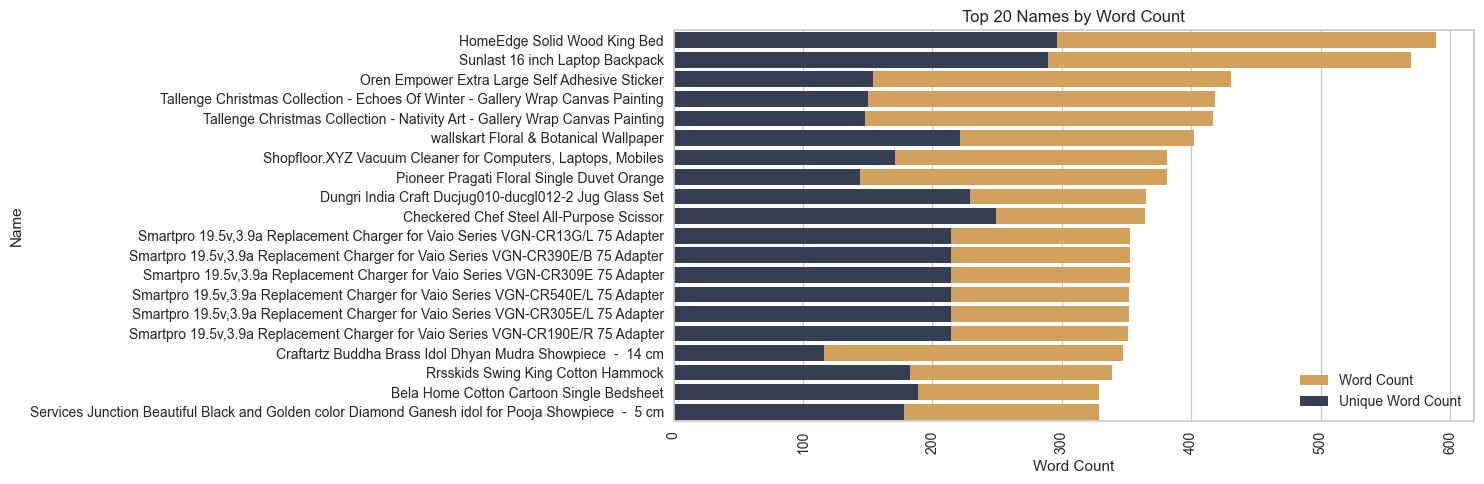

In [82]:
sorted_df = df.sort_values("word_count", ascending=False)    
top_names = sorted_df["product_name"].head(20)  
# top_names = [name[:60] + "..." if len(name) > 50 else name for name in top_names]    
  
top_word_counts = sorted_df["word_count"].head(20)  
top_unique_counts = sorted_df["unique_word_count"].head(20)  
  
plt.figure(figsize=(15, 5))  
  
# Create a horizontal barplot using seaborn    
sns.barplot(y=top_names, x=top_word_counts, orient="h",  color="#e7a44a", label="Word Count")    
sns.barplot(y=top_names, x=top_unique_counts, orient="h",  color="#313c59", label="Unique Word Count")    
  
# Set the title and axes labels    
plt.title("Top 20 Names by Word Count")    
plt.xlabel("Word Count")    
plt.ylabel("Name")    

# Rotate x-axis labels for better readability    
plt.xticks(rotation=90)
    
# Display the plot 
plt.legend()
plt.tight_layout()  
plt.show()  


In [83]:
# Étape 2 : Vectorisation avec TF-IDF  
vectorizer = TfidfVectorizer()  
description_vector = vectorizer.fit_transform(df['clean_desc'])  
  
# Concaténation des features TF-IDF et les features supplémentaires  
X = pd.concat([pd.DataFrame(description_vector.toarray())], axis=1)  
# X = pd.concat([pd.DataFrame(description_vector.toarray()), df[['word_count', 'unique_word_count']].astype(int)], axis=1)  

In [84]:
X.columns = X.columns.astype(str)  

# Étape 3 : Réduction de dimension  
pca = PCA(n_components=2)  
description_2d_pca = pca.fit_transform(X)  
  
tsne = TSNE(n_components=2, perplexity=50, n_iter=1000)  
description_2d_tsne = tsne.fit_transform(X)  
  
umap = UMAP(n_components=2)  
description_2d_umap = umap.fit_transform(X)  

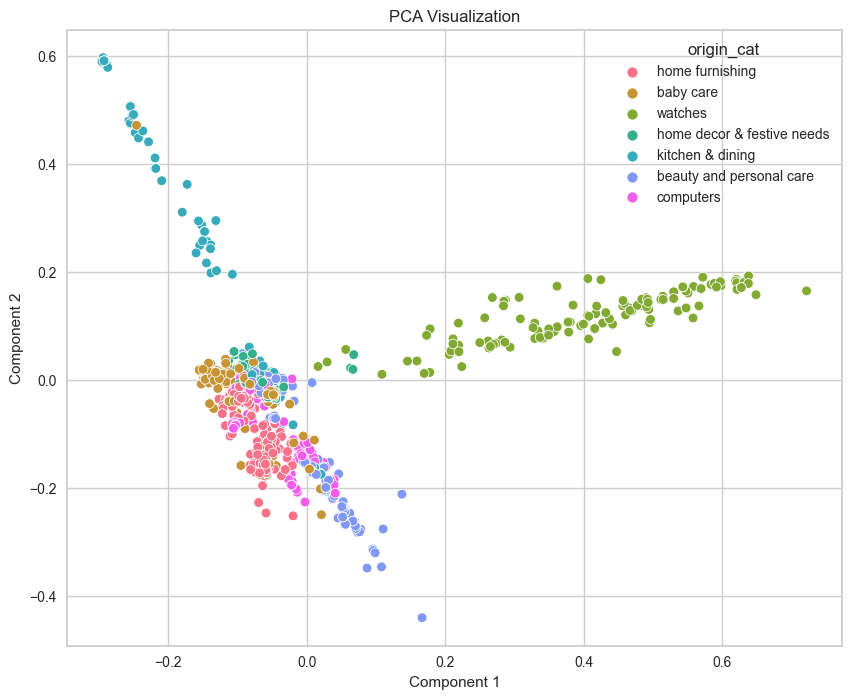

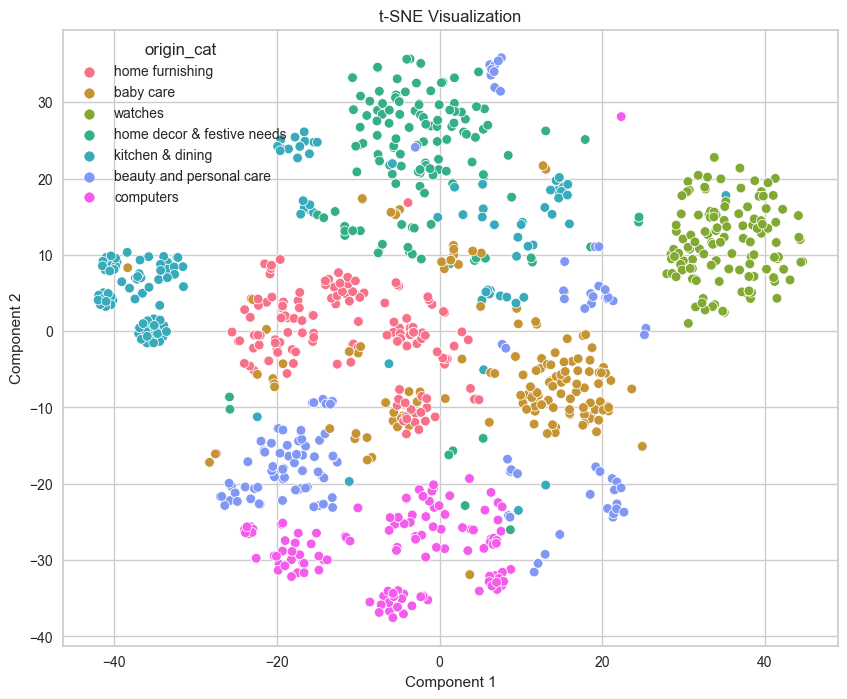

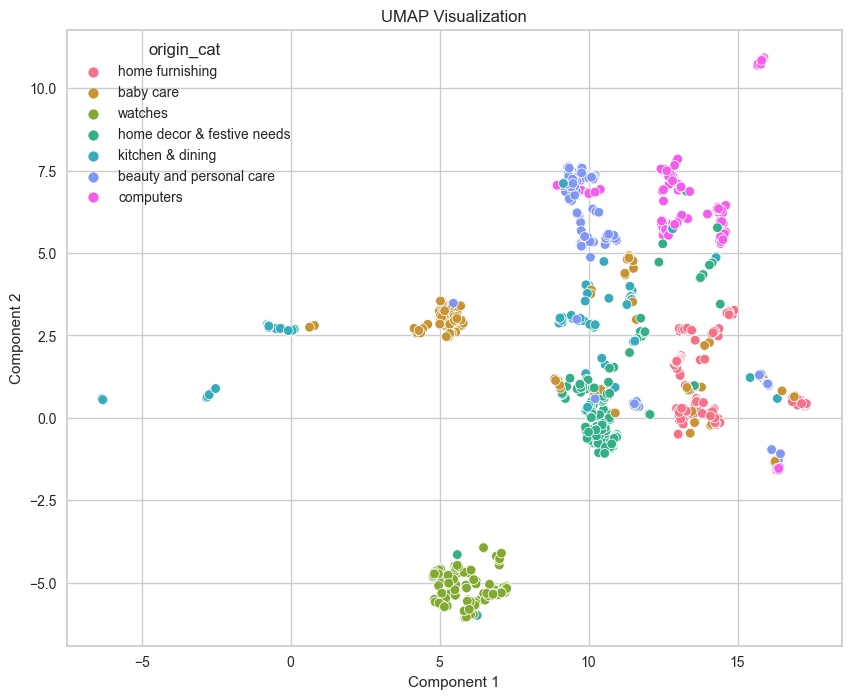

In [85]:
# Étape 5 : Visualisation  
def plot_components(data_2d, title):  
    df_eda = pd.DataFrame(data_2d, columns=['Component 1', 'Component 2'])  
    df_eda['origin_cat'] = df['cat']
    
    
    
    plt.figure(figsize=(10, 8))  
    sns.scatterplot(x='Component 1', y='Component 2', hue='origin_cat', data=df_eda)  
    plt.xlabel('Component 1')  
    plt.ylabel('Component 2')  
    plt.title(title)  
    plt.show()  
  
# Visualisation avec PCA, t-SNE, UMAP  
plot_components(description_2d_pca, 'PCA Visualization')  
plot_components(description_2d_tsne, 't-SNE Visualization')  
plot_components(description_2d_umap, 'UMAP Visualization')  

## Next

In [86]:
from sklearn.metrics import silhouette_score  
# Calculate silhouette score for PCA  
silhouette_pca = silhouette_score(description_2d_pca_clean, df['cat'])  
print("Silhouette Score (PCA):", silhouette_pca)  
  
# Calculate silhouette score for t-SNE  
silhouette_tsne = silhouette_score(description_2d_tsne_clean, df['cat'])  
print("Silhouette Score (t-SNE):", silhouette_tsne)  
  
# Calculate silhouette score for UMAP  
silhouette_umap = silhouette_score(description_2d_umap_clean, df['cat'])  
print("Silhouette Score (UMAP):", silhouette_umap)

print()

# Calculate silhouette score for PCA  
silhouette_pca = silhouette_score(description_2d_pca, df['cat'])  
print("Silhouette Score (PCA):", silhouette_pca)  
  
# Calculate silhouette score for t-SNE  
silhouette_tsne = silhouette_score(description_2d_tsne, df['cat'])  
print("Silhouette Score (t-SNE):", silhouette_tsne)  
  
# Calculate silhouette score for UMAP  
silhouette_umap = silhouette_score(description_2d_umap, df['cat'])  
print("Silhouette Score (UMAP):", silhouette_umap)



Silhouette Score (PCA): -0.0029471034574531704
Silhouette Score (t-SNE): 0.1899564
Silhouette Score (UMAP): 0.306897

Silhouette Score (PCA): -0.002948312959688109
Silhouette Score (t-SNE): 0.23887193
Silhouette Score (UMAP): 0.27349424


/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


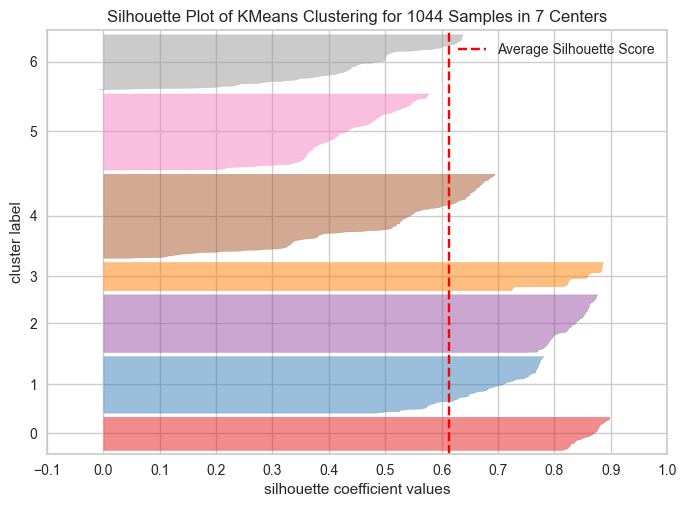

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1044 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [87]:
from sklearn.cluster import KMeans  
from yellowbrick.cluster import SilhouetteVisualizer

kmeans = KMeans(n_clusters=7, random_state=42).fit(description_2d_umap_clean)  

visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(description_2d_umap_clean)    # Fit the data to the visualizer
visualizer.poof()

/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


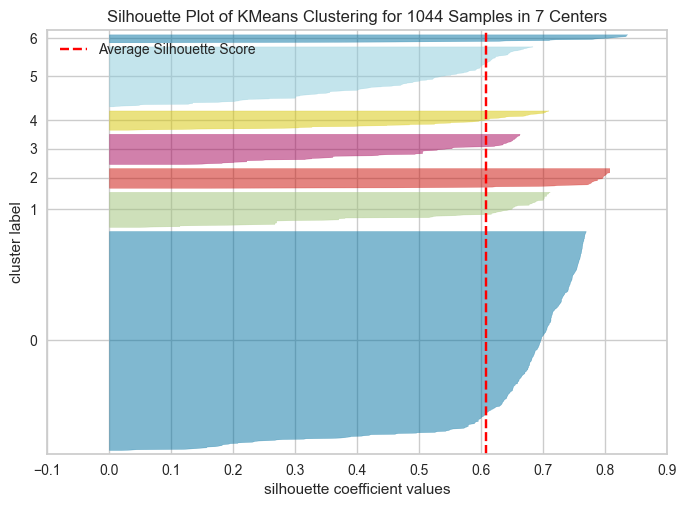

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1044 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [88]:
from yellowbrick.cluster import SilhouetteVisualizer  

kmeans = KMeans(n_clusters=7)  

# # Create the SilhouetteVisualizer for PCA  
visualizer_pca = SilhouetteVisualizer(kmeans, colors='yellowbrick')  
visualizer_pca.fit(description_2d_pca, df['cat'])  
visualizer_pca.show()  


/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


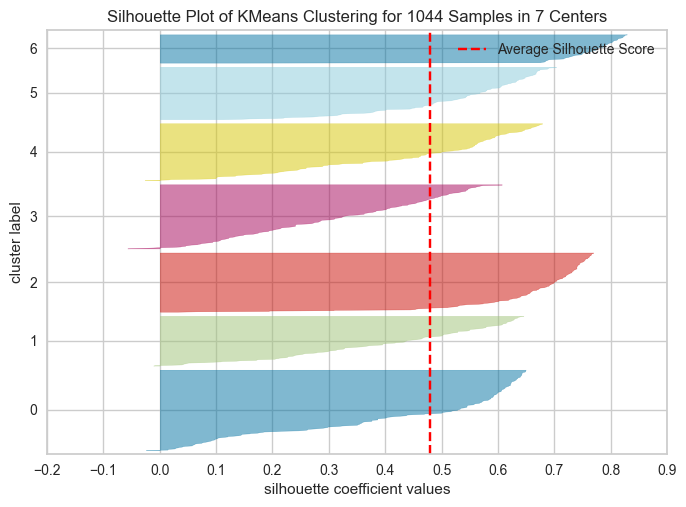

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1044 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [89]:
kmeans = KMeans(n_clusters=7)  

# Create the SilhouetteVisualizer for t-SNE  
visualizer_tsne = SilhouetteVisualizer(kmeans, colors='yellowbrick')  
visualizer_tsne.fit(description_2d_tsne, df['cat'])  
visualizer_tsne.show()  
  

In [90]:
kmeans = KMeans(n_clusters=7)  

# # Create the SilhouetteVisualizer for UMAP  
visualizer_umap = SilhouetteVisualizer(kmeans, colors='yellowbrick')  
visualizer_umap.fit(description_2d_umap, origin_df['cat'])  
visualizer_umap.show()  

NameError: name 'origin_df' is not defined